## Caique Rafael dos Santos, Rafael Rezende da Silva
#### Dados de Feminicídio do Primeiro Trimestre no estado de São Paulo
- http://www.ssp.sp.gov.br/transparenciassp/ <br />
O trabalho extrai dados do link acima
com foco no estado civil, periodo da ocorrência e tipo da violencia. <br />
Os dados estão comprometidos uma vez que ao restringir os dados apenas para a maioria,
que tem o estado civil de união estavel e solteiros, e o tipo de violência é homicidio,
qualificado o periodo da ocorrência se altera em relação do total sem os filtros.

In [10]:
import pandas as pd
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [11]:
df = pd.read_excel("DadosBO_2019(FEMINICIDIO).xlsx")

In [12]:
df.shape

(77, 51)

In [13]:
df.describe()

,ANO_BO,NUM_BO,NUMERO,LATITUDE,LONGITUDE,RG,IDADE,CORCUTIS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO
count,77.0,77.000000,77.000000,14.000000,14.000000,6.800000e+01,70.000000,0.0,0.0,0.0,0.0,0.0,0.0,77.0,77.0
mean,2019.0,532.441558,75.077922,-23.046747,-47.060285,3.621171e+07,37.600000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
std,0.0,629.284357,380.353602,0.461011,0.850232,1.378438e+07,11.666128,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
min,2019.0,15.000000,0.000000,-23.683681,-49.948532,7.592875e+06,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
25%,2019.0,89.000000,0.000000,-23.464058,-46.984090,2.719670e+07,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
50%,2019.0,281.000000,0.000000,-22.823629,-46.893262,3.704332e+07,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
75%,2019.0,774.000000,0.000000,-22.723001,-46.802868,4.743140e+07,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
max,2019.0,3010.000000,2355.000000,-22.216694,-46.433882,6.042539e+07,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ANO_BO                    77 non-null     int64         
 1   NUM_BO                    77 non-null     int64         
 2   NUMERO_BOLETIM            77 non-null     object        
 3   BO_INICIADO               77 non-null     datetime64[ns]
 4   BO_EMITIDO                77 non-null     datetime64[ns]
 5   DATAOCORRENCIA            77 non-null     datetime64[ns]
 6   PERIODOOCORRENCIA         77 non-null     object        
 7   DATACOMUNICACAO           77 non-null     datetime64[ns]
 8   DATAELABORACAO            77 non-null     datetime64[ns]
 9   BO_AUTORIA                77 non-null     object        
 10  FLAGRANTE                 77 non-null     object        
 11  NUMERO_BOLETIM_PRINCIPAL  7 non-null      object        
 12  LOGRADOURO              

In [15]:
df.groupby('ESTADOCIVIL').size().sort_values()

ESTADOCIVIL
Divorciado        3
Ignorado          4
Casado           14
União Estável    20
Solteiro         28
dtype: int64

<AxesSubplot:ylabel='ESTADOCIVIL'>

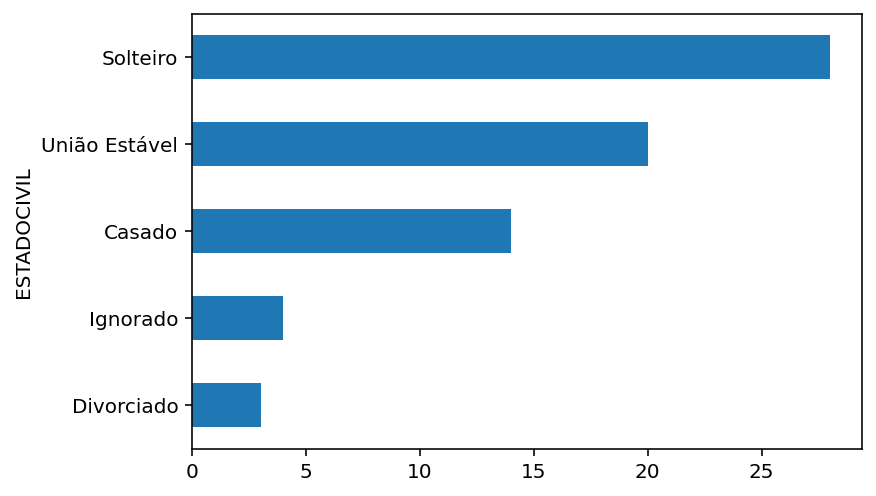

In [16]:
df.groupby('ESTADOCIVIL').size().sort_values().plot(kind='barh')

#### Vemos que a maioria dos relatos de feminicídios são de pessoas solteiras  ou em união estável

In [17]:
df.groupby('PERIODOOCORRENCIA').size().sort_values()

PERIODOOCORRENCIA
A TARDE         14
A NOITE         16
PELA MANHÃ      19
DE MADRUGADA    28
dtype: int64

<AxesSubplot:ylabel='PERIODOOCORRENCIA'>

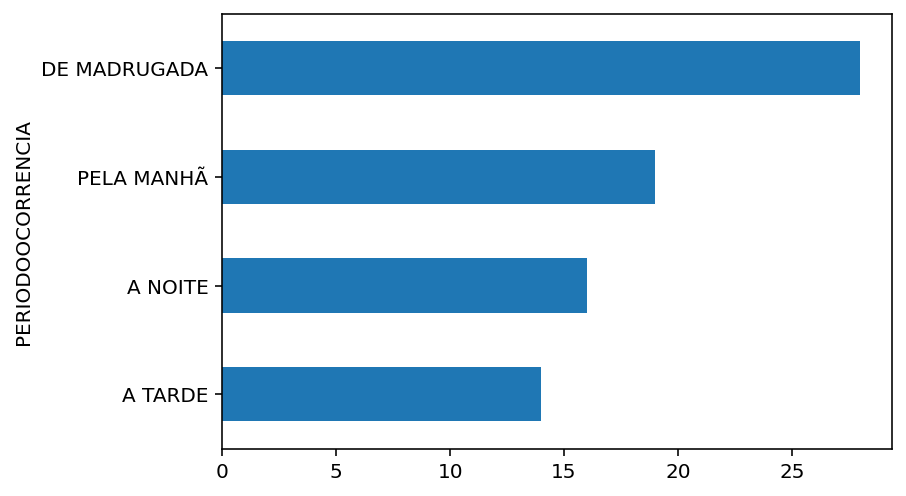

In [18]:
df.groupby('PERIODOOCORRENCIA').size().sort_values().plot(kind='barh')

#### Observamos que a maioria dos relatos de feminicídios ocorrem pela madrugada

In [19]:
df.groupby('RUBRICA').size().sort_values()

RUBRICA
A.I.-Posse irregular de arma de fogo de uso permitido (Art.12)     1
Destruição, subtração ou ocultação de cadáver (art. 211)           1
Furto qualificado (art. 155, §4o.) - ESTABELECIMENTO-OUTROS        1
Morte suspeita                                                     1
Porte ilegal de arma de fogo de uso permitido (Art. 14)            1
A.I.-Homicídio qualificado (art. 121, §2o.)                        2
Homicídio simples (art. 121)                                       2
Suicídio consumado                                                 5
Violência Doméstica                                                9
Homicídio qualificado (art. 121, §2o.)                            54
dtype: int64

<AxesSubplot:ylabel='RUBRICA'>

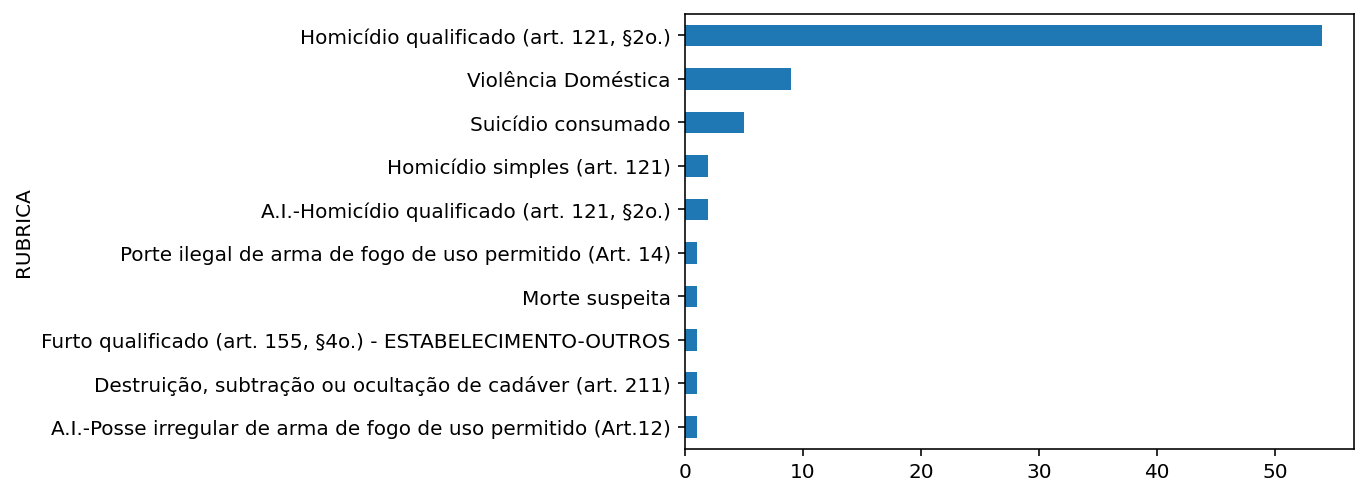

In [20]:
df.groupby('RUBRICA').size().sort_values().plot(kind='barh')

#### De todos os relatos, mais de 70% são descritos como homicídio qualificado

In [21]:
df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and ESTADOCIVIL == \"Solteiro\"').PERIODOOCORRENCIA.value_counts()

PELA MANHÃ      6
DE MADRUGADA    4
A NOITE         4
A TARDE         3
Name: PERIODOOCORRENCIA, dtype: int64

<AxesSubplot:>

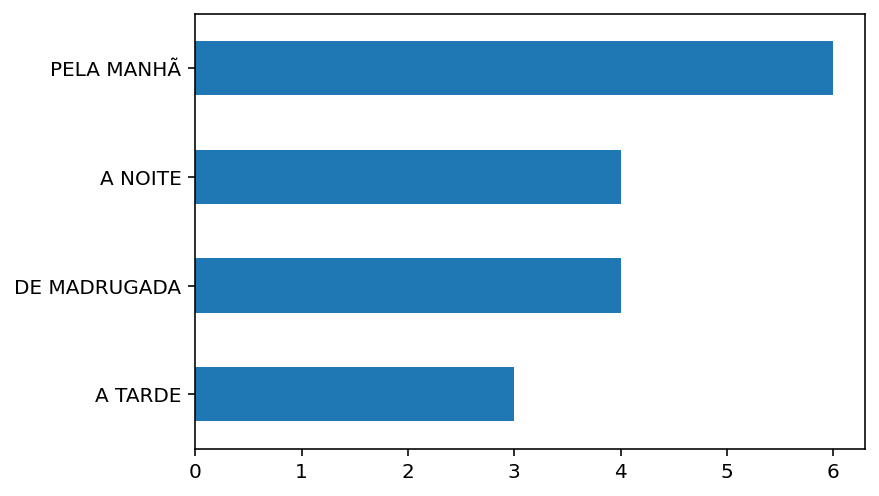

In [22]:
df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and ESTADOCIVIL == \"Solteiro\"').PERIODOOCORRENCIA.value_counts().sort_values().plot(kind='barh')

#### Quando temos foco só em homicídios qualificados em relação a pessoas solteiras a maioria dos casos ocorre pela manhã

In [23]:
df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and ESTADOCIVIL == \"União Estável\"').PERIODOOCORRENCIA.value_counts()

PELA MANHÃ      7
DE MADRUGADA    6
A NOITE         1
Name: PERIODOOCORRENCIA, dtype: int64

<AxesSubplot:>

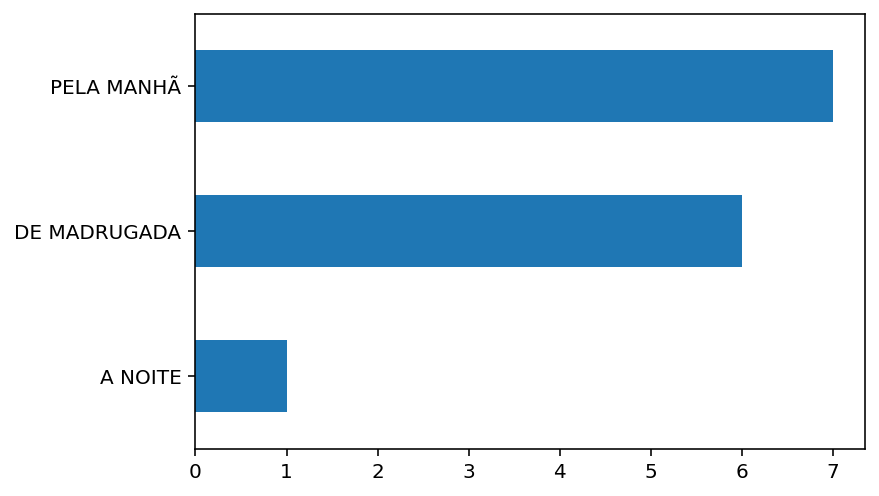

In [24]:
df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and ESTADOCIVIL == \"União Estável\"').PERIODOOCORRENCIA.value_counts().sort_values().plot(kind='barh')

In [25]:
#### O que também se repete em relação a pessoas em união estável

In [26]:
#### Com os dados obtidos,concluimos que a maioria dos relatos são de pessoas solteiras ou em união estável, ocorridos pela madrugada, e se referem a homicídios qualificados. Mas quando temos foco só em homicídios qualificados em relação a pessoas solteiras ou em união estável, a maioria dos casos ocorrem pela manhã, contrariando a maioria total dos casos.